In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
path = "./data/"
base = "eex_power_base_"
peak = "eex_power_peak_"
periods = ["d", "w", "wkd", "m", "q", "y"]
csv = ".csv"
spot = "epex_spot_power.csv"

In [56]:
df_base = pd.read_csv(path+spot, header = 0, parse_dates=[0], skiprows= lambda i: i>1932*24)

In [57]:
df_base = df_base.groupby(df_base["time"].dt.date).mean().reset_index()

/tmp/ipykernel_5821/2474838109.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_base = df_base.groupby(df_base["time"].dt.date).mean().reset_index()


In [58]:
df_base.columns = ["date","spot"]

In [59]:
#df_base = df_base[::-1]

In [60]:
for period in periods:
    df = pd.read_csv(path + base + period + csv, header=0, parse_dates = [0])
    df["date"] = df["date"].dt.date
    df_base = df_base.merge(df, how = "inner",  on="date")

In [61]:
def delete_NA(df, perc = 0.25):
    columns = df.columns
    len = df.shape[0]
    dropped = []
    for col in columns:
        if df[col].isna().sum() > perc*len:
            df.drop(col, inplace = True, axis = 1)
            dropped.append(col)
    return dropped


In [62]:
delete_NA(df_base)

['d07',
 'd08',
 'd09',
 'd10',
 'd11',
 'd12',
 'd13',
 'd14',
 'w05',
 'w06',
 'wkd00',
 'wkd03',
 'wkd04',
 'M10',
 'q08',
 'q09',
 'q10',
 'q11',
 'q12',
 'y07',
 'y08',
 'y09',
 'y10']

In [63]:
df_base. columns

Index(['date', 'spot', 'd00', 'd01', 'd02', 'd03', 'd04', 'd05', 'd06', 'w00',
       'w01', 'w02', 'w03', 'w04', 'wkd01', 'wkd02', 'M00', 'M01', 'M02',
       'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09', 'q01', 'q02', 'q03',
       'q04', 'q05', 'q06', 'q07', 'y01', 'y02', 'y03', 'y04', 'y05', 'y06'],
      dtype='object')

In [68]:
df_base.shape

(1931, 39)

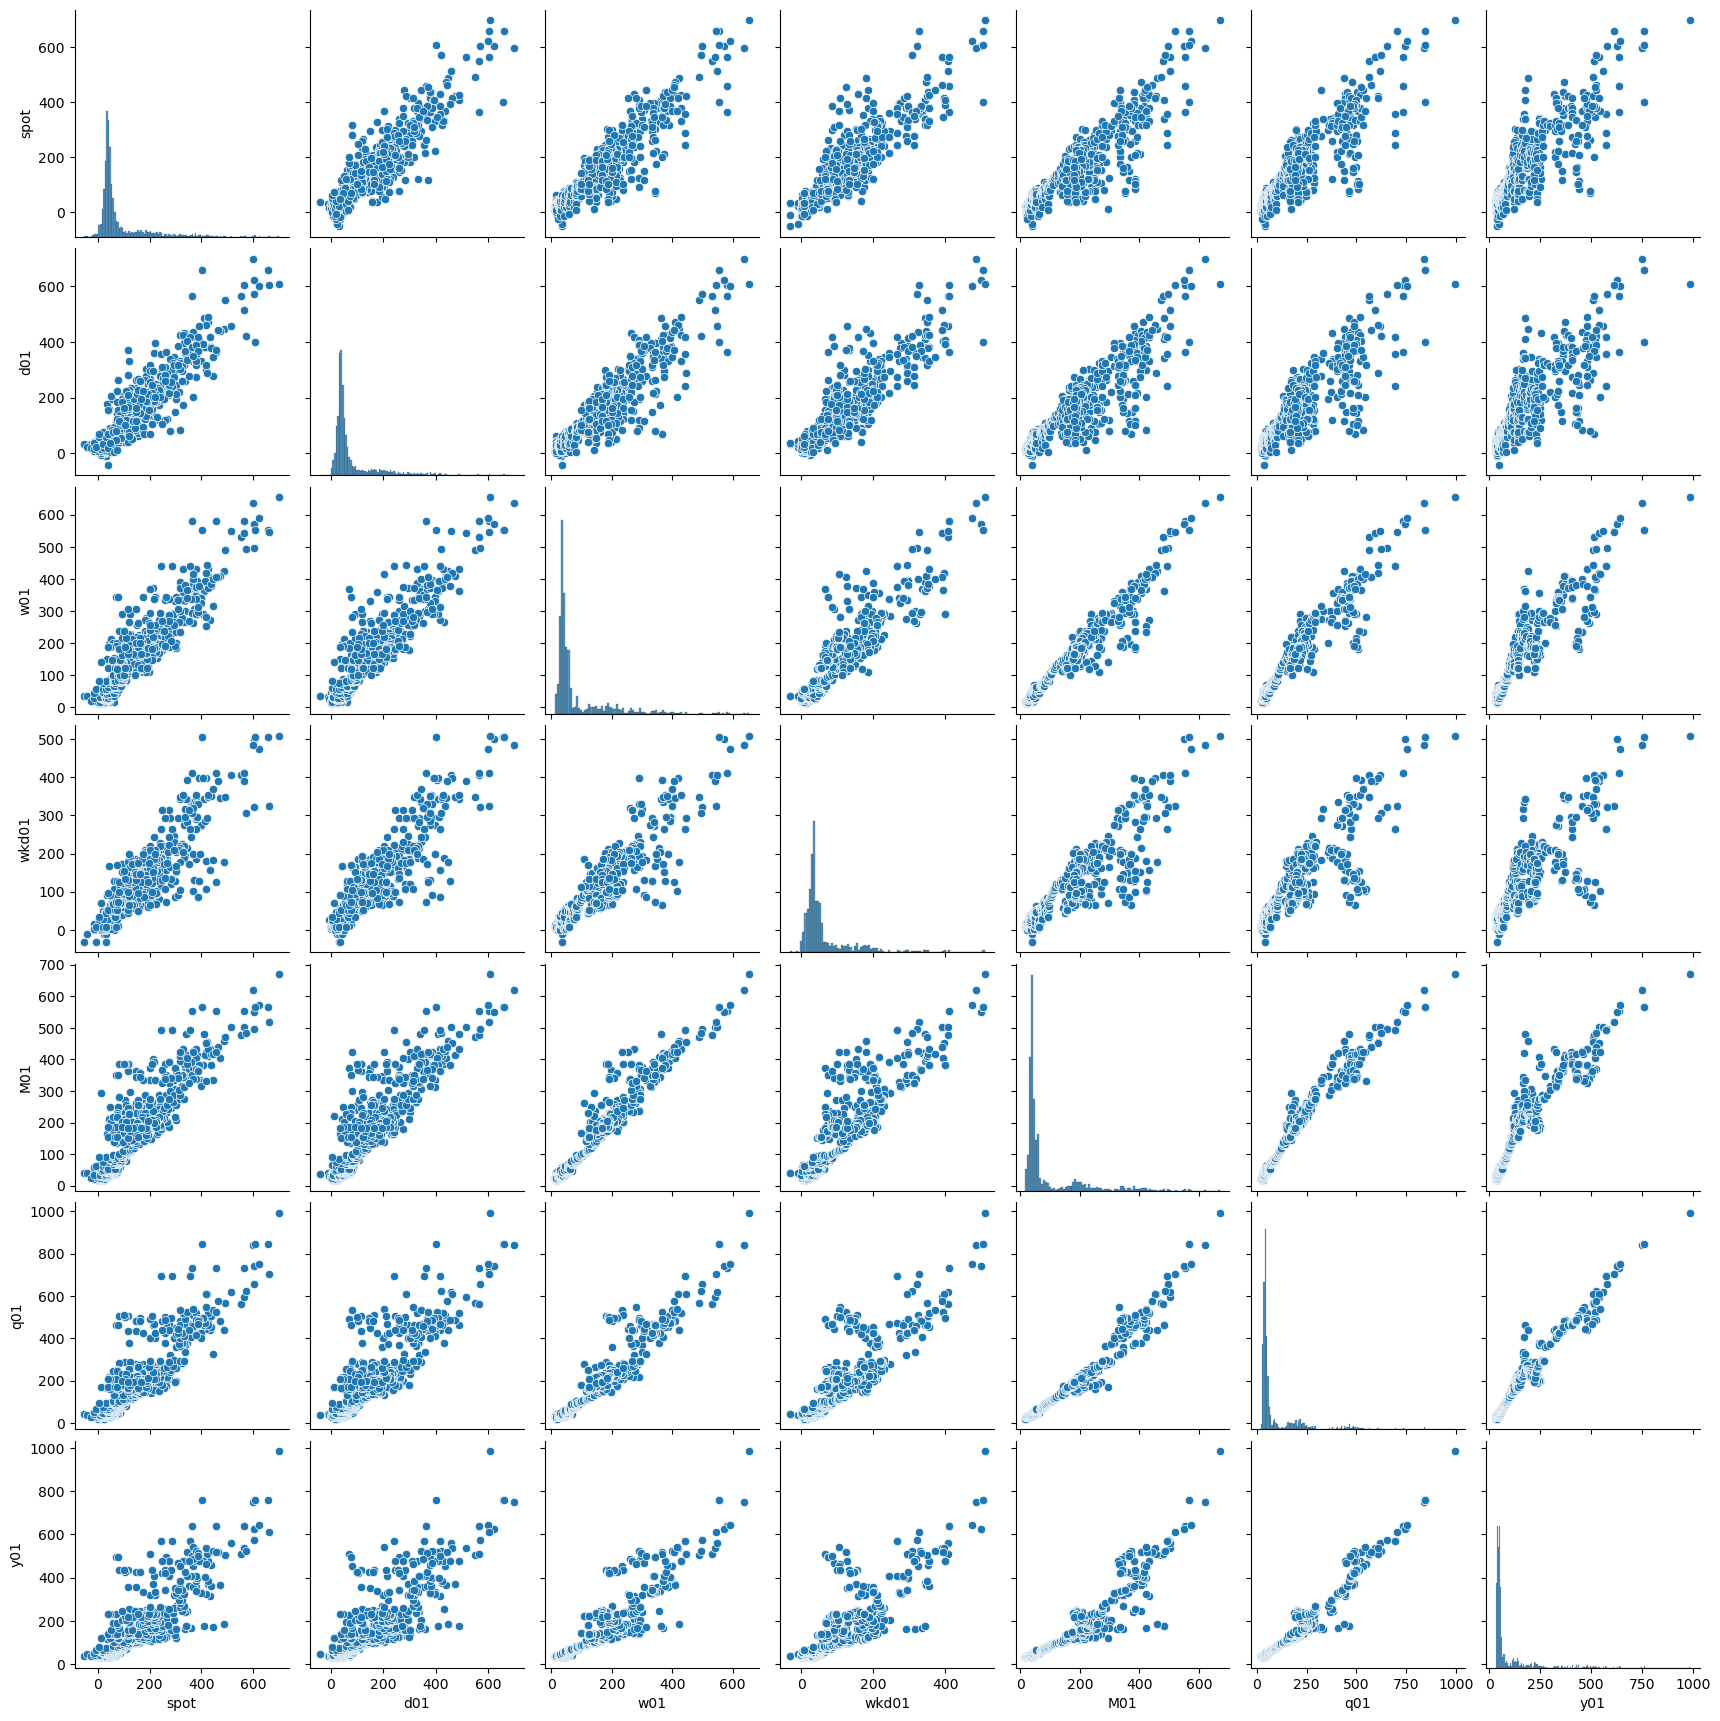

In [67]:
sns.pairplot(df_base[["spot", "d01", "w01", "wkd01", "M01", "q01", "y01"]])

<AxesSubplot: >

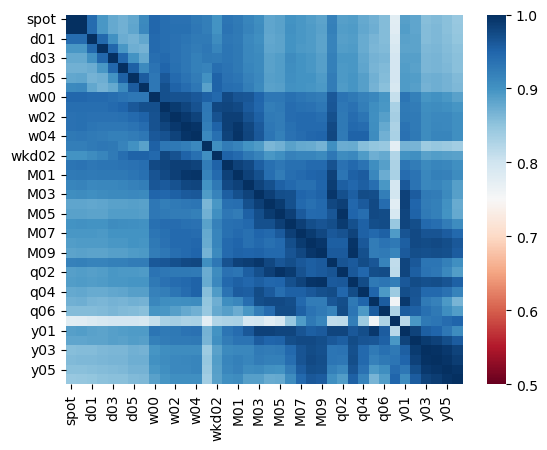

In [74]:
kwargs = {"vmin": 0.5, "vmax": 1, "annot": False, "cmap": "RdBu"}
sns.heatmap(df_base.corr(numeric_only=True), **kwargs)